In [1]:
# **************************#
#* Michael Telahun * #
#* CECS 590-01 * #
#* Assignment 1 * #
#************************* #

In [2]:
import Michael_Telahun_problem_1 as michael
import random
import time
import os
import math
import numpy as np
import re
import sys
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from keras import models, layers, losses, metrics, optimizers
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [3]:
import seaborn as sns
sns.set
sns.set_style("darkgrid")

# (1)

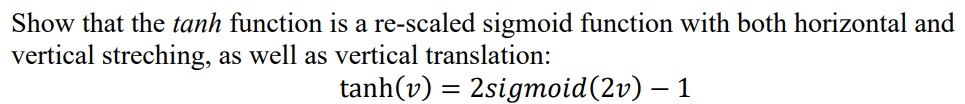

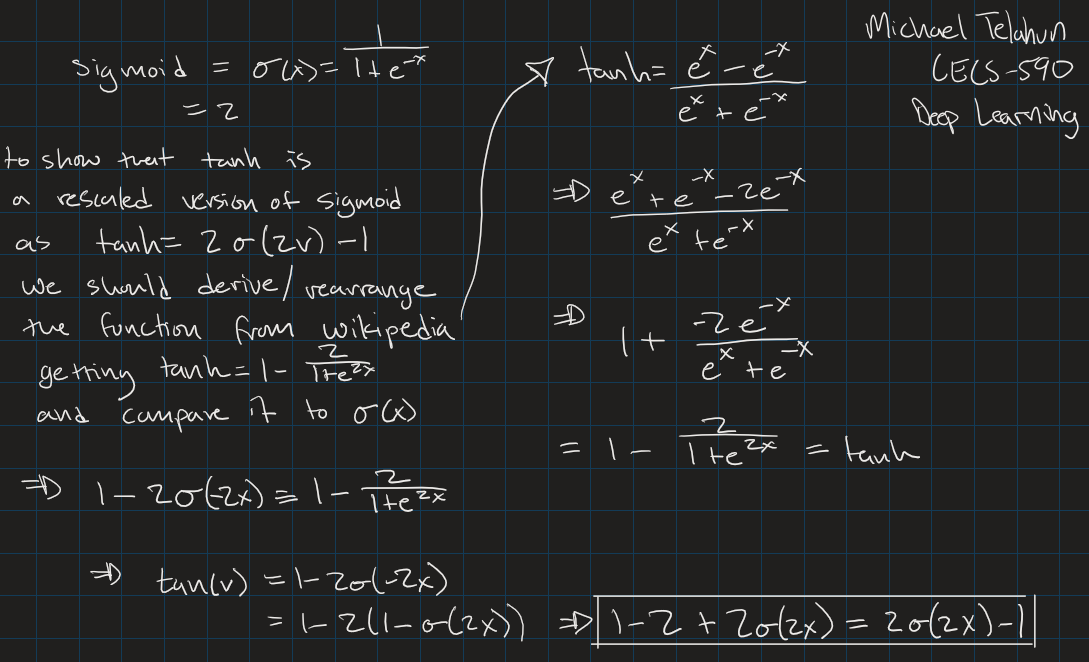

# (2)

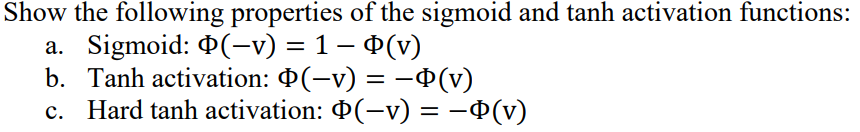

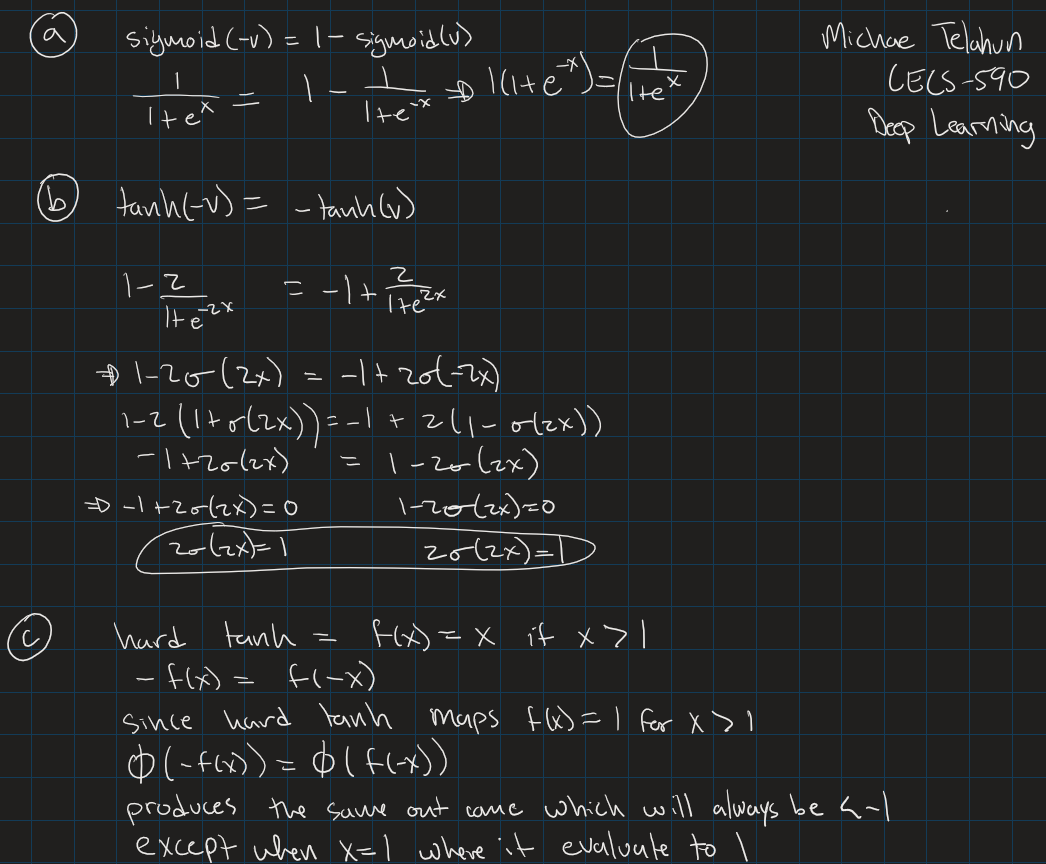

# (3)

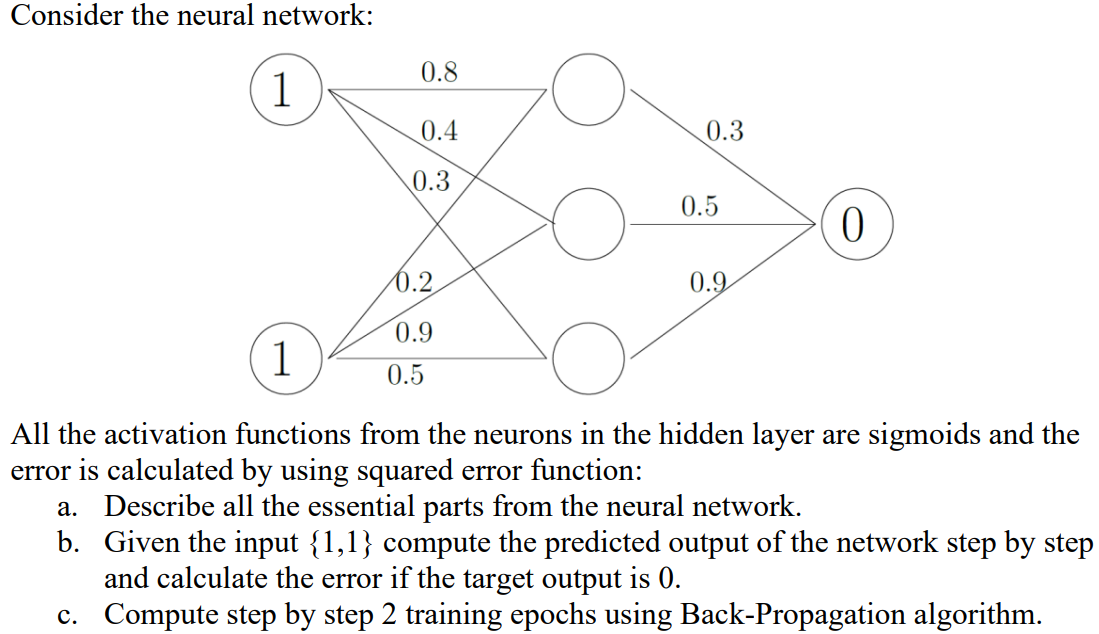

## a) The network has three layers where the first is the input layer, the second is a hidden layer with sigmoid as the activation function, and the last is the output layer (presumably also with sigmoid activation). Each layer is dense or fully connected. There is no bias added to any of the layers/nodes. This is a very simple network. This is a small MLP. There is no momentum or learning rate specified.

## b) computing output & error

In [4]:
inputNode1, inputNode2, targetNode = 1, 1, 0
inputWeights1 = [0.8, 0.4, 0.3]
inputWeights2 = [0.2, 0.9, 0.5]
hiddenWeights = [0.3, 0.5, 0.9]

#### Predicted Hidden Node 1 & error

In [5]:
p_hiddenNode1 = michael.sigmoid((inputNode1 * inputWeights1[0]) 
                                + (inputNode2 * inputWeights2[0]))
h1Error = michael.MSE(hiddenWeights[0], p_hiddenNode1, 2)
p_hiddenNode1, h1Error

(0.7310585786300049, 0.09290574910526006)

#### Predicted Hidden Node 2 & error

In [6]:
p_hiddenNode2 = michael.sigmoid((inputNode1 * inputWeights1[1]) 
                                + (inputNode2 * inputWeights2[1]))
h2Error = michael.MSE(hiddenWeights[1], p_hiddenNode2, 2)
p_hiddenNode2, h2Error

(0.7858349830425586, 0.040850818765469886)

#### Predicted Hidden Node 3 & error

In [7]:
p_hiddenNode3 = michael.sigmoid((inputNode1 * inputWeights1[2]) 
                              + (inputNode2 * inputWeights1[2]))
h3Error = michael.MSE(hiddenWeights[2], p_hiddenNode3, 2)
p_hiddenNode3, h3Error

(0.6456563062257954, 0.03234535728135319)

### Predicted Output and Error

In [8]:
p_output = michael.sigmoid((p_hiddenNode1 * hiddenWeights[0]) 
                           + (p_hiddenNode2 * hiddenWeights[1]) 
                           + (p_hiddenNode3 * hiddenWeights[2]))
outputError = michael.MSE(targetNode, p_output, 2)
p_output, outputError

(0.7673353425710626, 0.294401763979325)

## c) computing 2 epochs
- already computed the predicted hidden nodes, the predicted output, and each of the corresponding errors for the first iteration
    - compute the gradiant then compute another forward pass followed by another back prop
    - at the end of the second back prop the second epoch is over

#### arbitrary learning rate

In [9]:
learningRate = 0.1

In [10]:
### just for reference
# inputNode1, inputNode2, targetNode = 1, 1, 0
# inputWeights1 = [0.8, 0.4, 0.3]
# inputWeights2 = [0.2, 0.9, 0.5]
# hiddenWeights = [0.3, 0.5, 0.9]

### ** Epoch 1 **

#### from above - feed forward (forward propagation) to hidden layer

In [11]:
p_hiddenNodes = [p_hiddenNode1, p_hiddenNode2, p_hiddenNode3]
hiddenError = [h2Error, h2Error, h3Error]

### Back propagating

##### weights connected to output layer

In [12]:
################## hidden_W1 -> output_1
### derivative of error on predicted output
dError = michael.dMSE(targetNode, p_output)

### derivative of activation on predicted output
dActivationOutput = michael.dSigmoid(p_output)

### compute gradiant wrt weight_i
gradiant = dError * dActivationOutput * p_hiddenNodes[0]

### update weight_i
new_hidden1 = hiddenWeights[0] - (learningRate * gradiant)


################## hidden_W2 -> output_1
gradiant = dError * dActivationOutput * p_hiddenNodes[1]
new_hidden2 = hiddenWeights[1] - (learningRate * gradiant)


################## hidden_W3 -> output_1
gradiant = dError * dActivationOutput * p_hiddenNodes[2]
new_hidden3 = hiddenWeights[2] - (learningRate * gradiant)


newHiddenWeights = [new_hidden1, new_hidden2, new_hidden3]
newHiddenWeights

[0.28785329993086123, 0.4869431778493832, 0.8892722775866064]

##### weights connected to input layer

In [13]:
################## input_1_W1 -> hidden_1##################
### derivative of error on predicted output
dError = michael.dMSE(targetNode, p_output)

### derivative of activation on predicted output
dActivationOutput = michael.dSigmoid(p_output)

### derivative of activation on predicted hiddenNode_i
dActivationHidden = michael.dSigmoid(p_hiddenNodes[0])

### compute gradiant wrt input weight_i and weight_hi connected to output
gradiant = dError * dActivationOutput * hiddenWeights[0] * dActivationHidden * inputWeights1[0]

### update weight_i for input_j
new_input11 = inputWeights1[0] - (learningRate * gradiant)


################## input_1_W2 -> hidden_2
dActivationHidden = michael.dSigmoid(p_hiddenNodes[1])
gradiant = dError * dActivationOutput * hiddenWeights[1] * dActivationHidden * inputWeights1[1]
new_input12 = inputWeights1[1] - (learningRate * gradiant)


################## input_1_W3 -> hidden_3
dActivationHidden = michael.dSigmoid(p_hiddenNodes[2])
gradiant = dError * dActivationOutput * hiddenWeights[2] * dActivationHidden * inputWeights1[2]
new_input13 = inputWeights1[2] - (learningRate * gradiant)

newInputWeights1 = [new_input11, new_input12, new_input13]
######################################################


################## input_2_W1 -> hidden_1##################
dActivationHidden = michael.dSigmoid(p_hiddenNodes[1])
gradiant = dError * dActivationOutput * hiddenWeights[0] * dActivationHidden * inputWeights2[0]
new_input21 = inputWeights2[0] - (learningRate * gradiant)


################## input_2_W2 -> hidden_2
dActivationHidden = michael.dSigmoid(p_hiddenNodes[2])
gradiant = dError * dActivationOutput * hiddenWeights[1] * dActivationHidden * inputWeights2[1]
new_input22 = inputWeights2[1] - (learningRate * gradiant)


################## input_1_W3 -> hidden_3
dActivationHidden = michael.dSigmoid(p_hiddenNodes[2])
gradiant = dError * dActivationOutput * hiddenWeights[2] * dActivationHidden * inputWeights2[2]
new_input23 = inputWeights2[2] - (learningRate * gradiant)

newInputWeights2 = [new_input21, new_input22, new_input23]
######################################################

print(newInputWeights1)
print(newInputWeights2)

[0.7991252609801877, 0.3992853633426242, 0.2989876898595625]
[0.19978560900278727, 0.8983128164326042, 0.49831281643260417]


### update weights

In [14]:
inputWeights1 = newInputWeights1 #[0.8, 0.4, 0.3]
inputWeights2 = newInputWeights2 #[0.2, 0.9, 0.5]
hiddenWeights = newHiddenWeights #[0.3, 0.5, 0.9]

### ** Epoch 2 **

#### forward propagate

In [15]:
### hidden node 1
p_hiddenNode1 = michael.sigmoid((inputNode1 * inputWeights1[0]) 
                                + (inputNode2 * inputWeights2[0]))
h1Error = michael.MSE(hiddenWeights[0], p_hiddenNode1, 2)


### hidden node 2
p_hiddenNode2 = michael.sigmoid((inputNode1 * inputWeights1[1]) 
                                + (inputNode2 * inputWeights2[1]))
h2Error = michael.MSE(hiddenWeights[1], p_hiddenNode2, 2)


### hidden node 3
p_hiddenNode3 = michael.sigmoid((inputNode1 * inputWeights1[2]) 
                              + (inputNode2 * inputWeights1[2]))
h3Error = michael.MSE(hiddenWeights[2], p_hiddenNode3, 2)


### predicted output
p_output = michael.sigmoid((p_hiddenNode1 * hiddenWeights[0]) 
                           + (p_hiddenNode2 * hiddenWeights[1]) 
                           + (p_hiddenNode3 * hiddenWeights[2]))
outputError = michael.MSE(targetNode, p_output, 2)
print(p_output, outputError)

0.7625277641920128 0.290724295581835


### Back propagating

##### weights connected to output layer

In [16]:
################## hidden_W1 -> output_1
### derivative of error on predicted output
dError = michael.dMSE(targetNode, p_output)

### derivative of activation on predicted output
dActivationOutput = michael.dSigmoid(p_output)

### compute gradiant wrt weight_i
gradiant = dError * dActivationOutput * p_hiddenNodes[0]

### update weight_i
new_hidden1 = hiddenWeights[0] - (learningRate * gradiant)


################## hidden_W2 -> output_1
gradiant = dError * dActivationOutput * p_hiddenNodes[1]
new_hidden2 = hiddenWeights[1] - (learningRate * gradiant)


################## hidden_W3 -> output_1
gradiant = dError * dActivationOutput * p_hiddenNodes[2]
new_hidden3 = hiddenWeights[2] - (learningRate * gradiant)


newHiddenWeights = [new_hidden1, new_hidden2, new_hidden3]
newHiddenWeights

[0.27576151169570445, 0.4739453819401476, 0.8785930522060543]

##### weights connected to input layer

In [17]:
################## input_1_W1 -> hidden_1##################
### derivative of error on predicted output
dError = michael.dMSE(targetNode, p_output)

### derivative of activation on predicted output
dActivationOutput = michael.dSigmoid(p_output)

### derivative of activation on predicted hiddenNode_i
dActivationHidden = michael.dSigmoid(p_hiddenNodes[0])

### compute gradiant wrt input weight_i and weight_hi connected to output
gradiant = dError * dActivationOutput * hiddenWeights[0] * dActivationHidden * inputWeights1[0]

### update weight_i for input_j
new_input11 = inputWeights1[0] - (learningRate * gradiant)


################## input_1_W2 -> hidden_2
dActivationHidden = michael.dSigmoid(p_hiddenNodes[1])
gradiant = dError * dActivationOutput * hiddenWeights[1] * dActivationHidden * inputWeights1[1]
new_input12 = inputWeights1[1] - (learningRate * gradiant)


################## input_1_W3 -> hidden_3
dActivationHidden = michael.dSigmoid(p_hiddenNodes[2])
gradiant = dError * dActivationOutput * hiddenWeights[2] * dActivationHidden * inputWeights1[2]
new_input13 = inputWeights1[2] - (learningRate * gradiant)

newInputWeights1 = [new_input11, new_input12, new_input13]
######################################################


################## input_2_W1 -> hidden_1##################
dActivationHidden = michael.dSigmoid(p_hiddenNodes[1])
gradiant = dError * dActivationOutput * hiddenWeights[0] * dActivationHidden * inputWeights2[0]
new_input21 = inputWeights2[0] - (learningRate * gradiant)


################## input_2_W2 -> hidden_2
dActivationHidden = michael.dSigmoid(p_hiddenNodes[2])
gradiant = dError * dActivationOutput * hiddenWeights[1] * dActivationHidden * inputWeights2[1]
new_input22 = inputWeights2[1] - (learningRate * gradiant)


################## input_1_W3 -> hidden_3
dActivationHidden = michael.dSigmoid(p_hiddenNodes[2])
gradiant = dError * dActivationOutput * hiddenWeights[2] * dActivationHidden * inputWeights2[2]
new_input23 = inputWeights2[2] - (learningRate * gradiant)

newInputWeights2 = [new_input21, new_input22, new_input23]
######################################################

print(newInputWeights1)
print(newInputWeights2)

[0.7982906471929707, 0.3985937725623149, 0.29799532789711003]
[0.19958104795798365, 0.8966801858422859, 0.4966588798285168]


# (4)

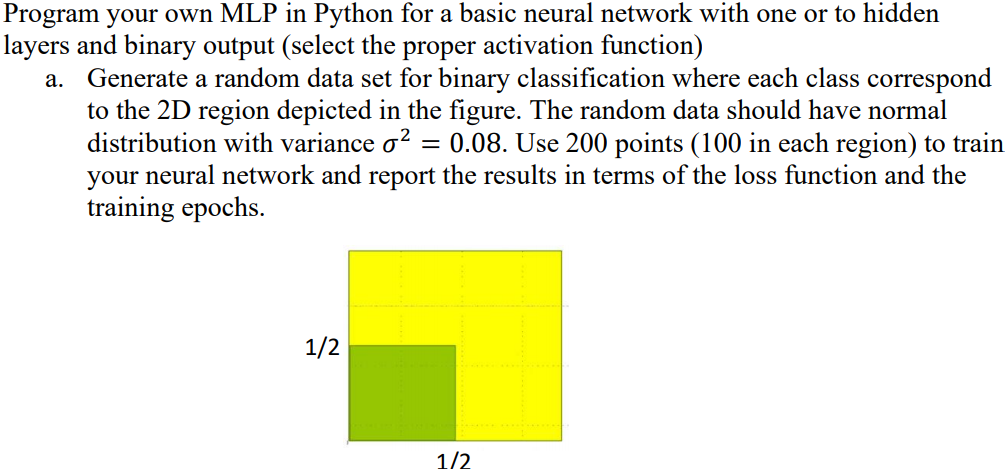

## a) Generating random data set with variance 0.08

In [18]:
binary_dataset = []
variance = 0.08
std = round(math.sqrt(variance), 3)

### this is the dataset for the green in 4.a

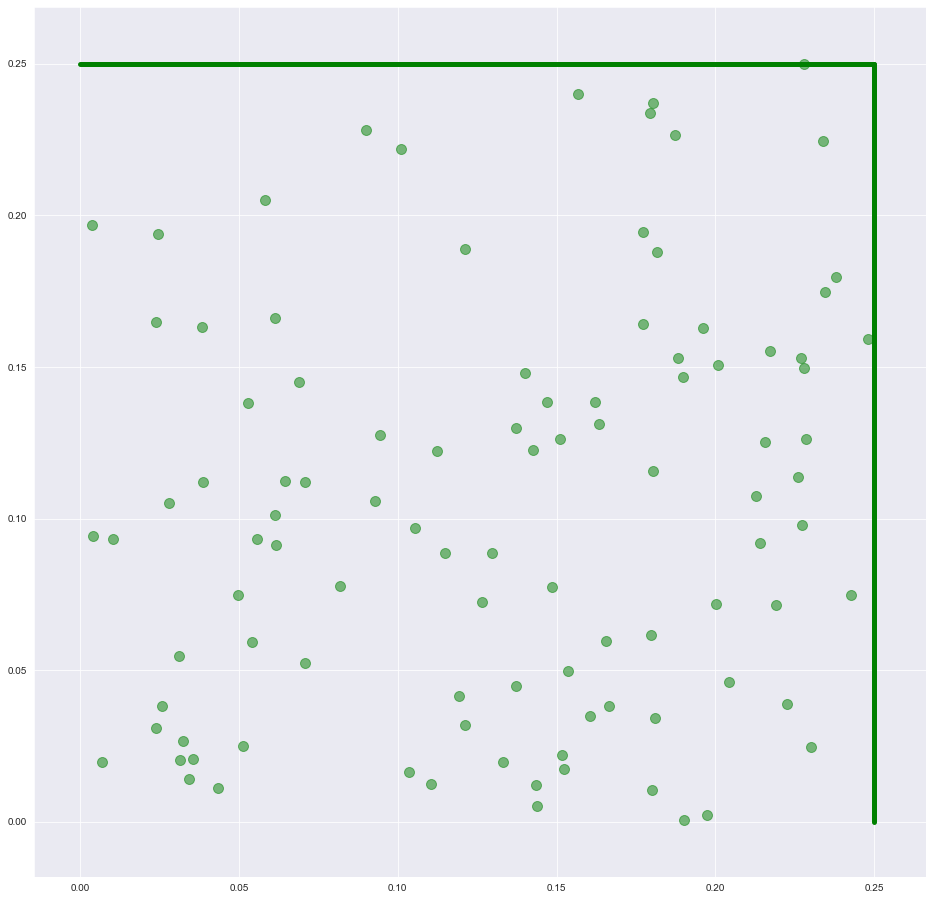

In [19]:
x1 = abs(np.random.normal(0, std, 1000))
y1 = abs(np.random.normal(0, std, 1000))

x2, y2 = [], []
for i, v in enumerate(x1):
    if x1[i] <= 0.25 and y1[i] <= 0.25 and len(x2) < 100:
        x2.append(x1[i])
        y2.append(y1[i])
binary_dataset.append(x2)
binary_dataset.append(y2)

fig = plt.figure(figsize=(16,16))
plt.scatter(x2,y2, c='g', s=100, alpha=0.5)
plt.plot([0,0.25], [0.25, 0.25], 'g', lw=5)
plt.plot([0.25,0.25], [0, 0.25], 'g', lw=5)

### this is the dataset for the yellow in 4.a
- ill admit it is a weird way of doing it

In [20]:
## top left
x1 = abs(np.random.normal(0, std, 500))
y1 = abs(np.random.normal(0, std, 500)) + 0.25

x2, y2 = [], []
for i, v in enumerate(x1):
    if x1[i] < 0.25 and y1[i] <= 0.5 and len(x2) < 33:
        x2.append(x1[i])
        y2.append(y1[i])
binary_dataset[0].extend(x2)
binary_dataset[1].extend(y2)
# plt.scatter(x2,y2)

In [21]:
## top right
x1 = abs(np.random.normal(0, std, 500)) + 0.25
y1 = abs(np.random.normal(0, std, 500)) + 0.25

x2, y2 = [], []
for i, v in enumerate(x1):
    if (0.25 < x1[i] <= 0.5) and (0.25 < y1[i] <= 0.5) and len(x2) < 33:
        x2.append(x1[i])
        y2.append(y1[i])
binary_dataset[0].extend(x2)
binary_dataset[1].extend(y2)
# plt.scatter(x2,y2)

In [22]:
## bottom right (someone has to get an extra point)
x1 = abs(np.random.normal(0, std, 500)) + 0.25
y1 = abs(np.random.normal(0, std, 500)) 

x2, y2 = [], []
for i, v in enumerate(x1):
    if x1[i] <= 0.5 and y1[i] < 0.25 and len(x2) < 34:
        x2.append(x1[i])
        y2.append(y1[i])
binary_dataset[0].extend(x2)
binary_dataset[1].extend(y2)
# plt.scatter(x2,y2)

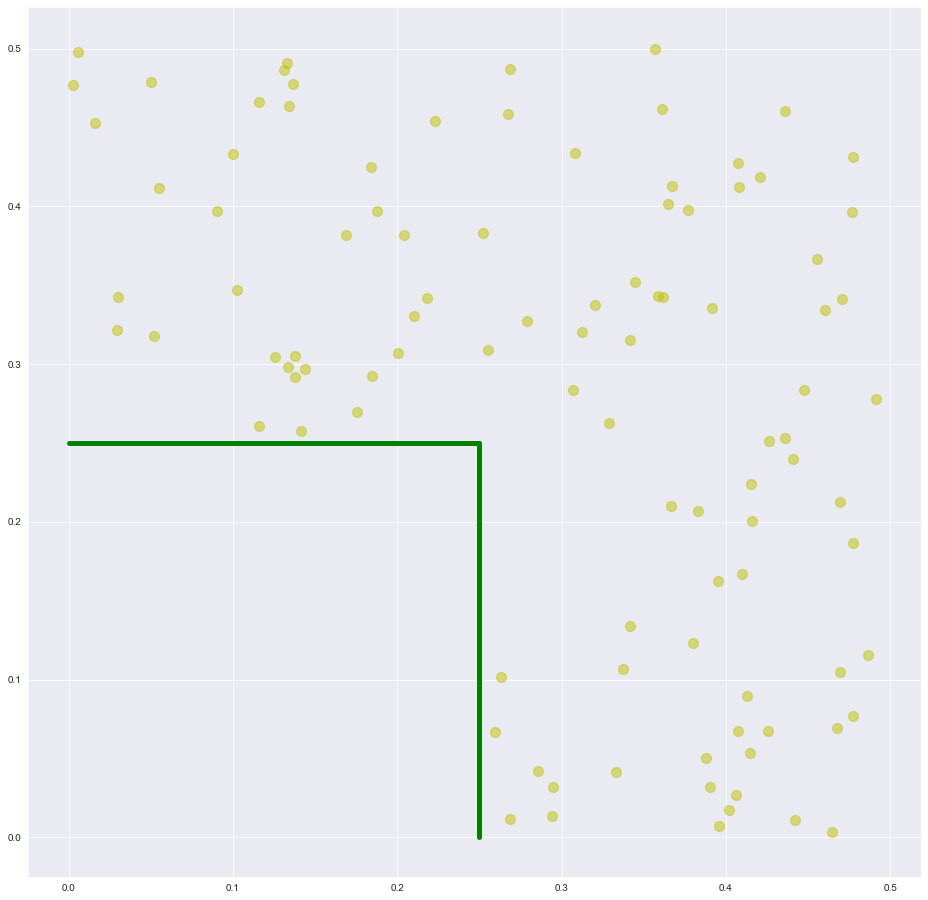

In [23]:
dataset = np.transpose(binary_dataset)

fig = plt.figure(figsize=(16,16))
for i, v in enumerate(dataset):
    if dataset[i][0] < 0.25 and dataset[i][1] < 0.25:
        pass
#         plt.scatter(dataset[i][0], dataset[i][1], c='g', s=100, alpha=0.5)
    else:
        plt.scatter(dataset[i][0], dataset[i][1], c='y', s=100, alpha=0.5)
plt.plot([0,0.25], [0.25, 0.25], 'g', lw=5)
plt.plot([0.25,0.25], [0, 0.25], 'g', lw=5)

In [24]:
df = pd.DataFrame(dataset)
## shuffle a few times
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
dataset = df.to_numpy()
df

,0,1
0,0.341836,0.133828
1,0.028110,0.105111
2,0.089874,0.227963
3,0.361861,0.342533
4,0.268708,0.011571
...,...,...
195,0.219108,0.071401
196,0.285551,0.042036
197,0.152244,0.017514
198,0.105517,0.096741


### generate labels

In [25]:
labels = []
ones = []
zeros = []
for i in range(len(dataset)):
    x0, y0 = dataset[i]
    if (x0 <= 0.25) and (y0 <= 0.25):
        labels.append(1)
        ones.append(i)
    else:
        labels.append(0)
        zeros.append(i)

### validate labels

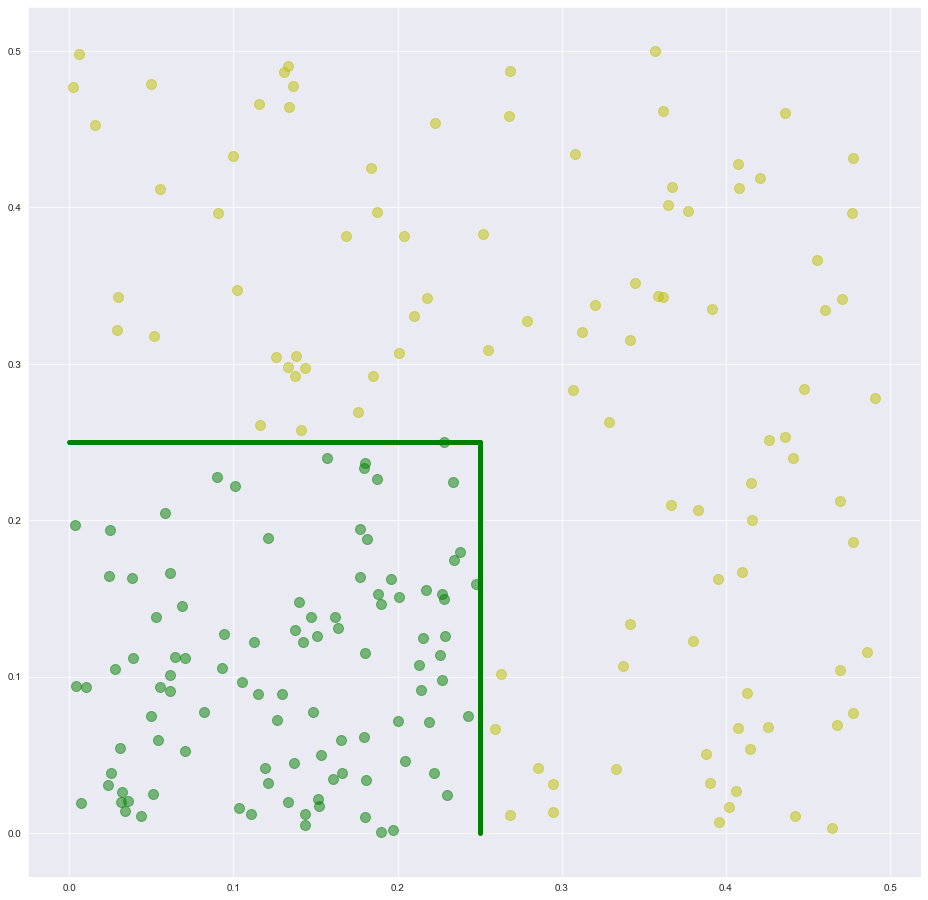

In [26]:
fig = plt.figure(figsize=(16,16))
for i,v in enumerate(labels):
    if labels[i] == 1:
        plt.scatter(dataset[i][0], dataset[i][1], c='g', s=100, alpha=0.5)
    else:
        plt.scatter(dataset[i][0], dataset[i][1], c='y', s=100, alpha=0.5)
plt.plot([0,0.25], [0.25, 0.25], 'g', lw=5)
plt.plot([0.25,0.25], [0, 0.25], 'g', lw=5)

### split training and validation sets

In [27]:
x_train = dataset[:160]
y_train = labels[:160]

x_val = dataset[-40:]
y_val = labels[-40:]

In [28]:
(x_train.shape, len(y_train)), (x_val.shape, len(y_val))

(((160, 2), 160), ((40, 2), 40))

## For this problem I chose to use:
- 1 hidden layer
- relu as the activation for the input and hidden layers (because binary data: 0 or 1 as ouput) 
- sigmoid for activation in last layer (because sum of outputs does not to equal 1)
- rmsprop (because its good for SGD) 
- binary_crossentropy for loss (because data is binary)

## My model

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [31]:
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(x_val, y_val))


Train on 160 samples, validate on 40 samples
Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 0.7176 - acc: 0.5000 - val_loss: 0.7078 - val_acc: 0.5000
Epoch 2/100
160/160 [==============================] - 0s 87us/step - loss: 0.7046 - acc: 0.5000 - val_loss: 0.6997 - val_acc: 0.5000
Epoch 3/100
160/160 [==============================] - 0s 94us/step - loss: 0.6962 - acc: 0.5000 - val_loss: 0.6924 - val_acc: 0.5000
Epoch 4/100
160/160 [==============================] - 0s 131us/step - loss: 0.6887 - acc: 0.5000 - val_loss: 0.6857 - val_acc: 0.5000
Epoch 5/100
160/160 [==============================] - 0s 100us/step - loss: 0.6817 - acc: 0.6688 - val_loss: 0.6792 - val_acc: 0.8000
Epoch 6/100
160/160 [==============================] - 0s 100us/step - loss: 0.6747 - acc: 0.8562 - val_loss: 0.6729 - val_acc: 0.9000
Epoch 7/100
160/160 [==============================] - 0s 100us/step - loss: 0.6689 - acc: 0.9125 - val_loss: 0.6675 - val_acc: 0.9500
Epoch 8/100
1

Epoch 60/100
160/160 [==============================] - 0s 100us/step - loss: 0.2108 - acc: 0.9375 - val_loss: 0.2410 - val_acc: 0.9000
Epoch 61/100
160/160 [==============================] - 0s 88us/step - loss: 0.2095 - acc: 0.9563 - val_loss: 0.2377 - val_acc: 0.9250
Epoch 62/100
160/160 [==============================] - 0s 119us/step - loss: 0.2044 - acc: 0.9437 - val_loss: 0.2342 - val_acc: 0.9250
Epoch 63/100
160/160 [==============================] - 0s 119us/step - loss: 0.2000 - acc: 0.9437 - val_loss: 0.2300 - val_acc: 0.9250
Epoch 64/100
160/160 [==============================] - 0s 75us/step - loss: 0.1963 - acc: 0.9437 - val_loss: 0.2251 - val_acc: 0.9000
Epoch 65/100
160/160 [==============================] - 0s 112us/step - loss: 0.1929 - acc: 0.9437 - val_loss: 0.2216 - val_acc: 0.9250
Epoch 66/100
160/160 [==============================] - 0s 106us/step - loss: 0.1894 - acc: 0.9437 - val_loss: 0.2174 - val_acc: 0.9250
Epoch 67/100
160/160 [============================

## Evaluating the model

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

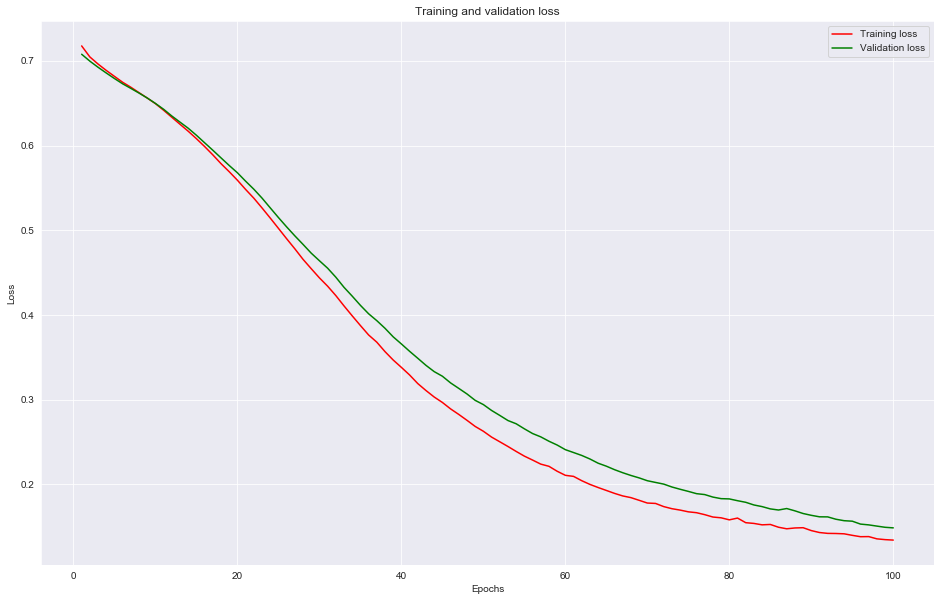

In [33]:
acc = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

# acc = history_dict['acc'][-100:]
# loss_values = history_dict['loss'][-100:]
# val_loss_values = history_dict['val_loss'][-100:]
# epochs = range(200, 300)

plt.figure(figsize=(16, 10))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

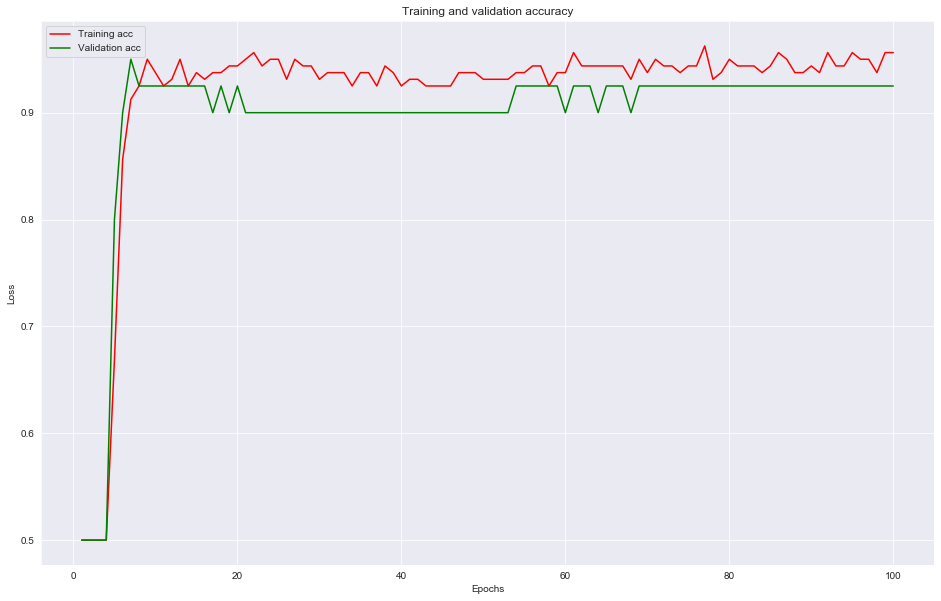

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(16, 10))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing

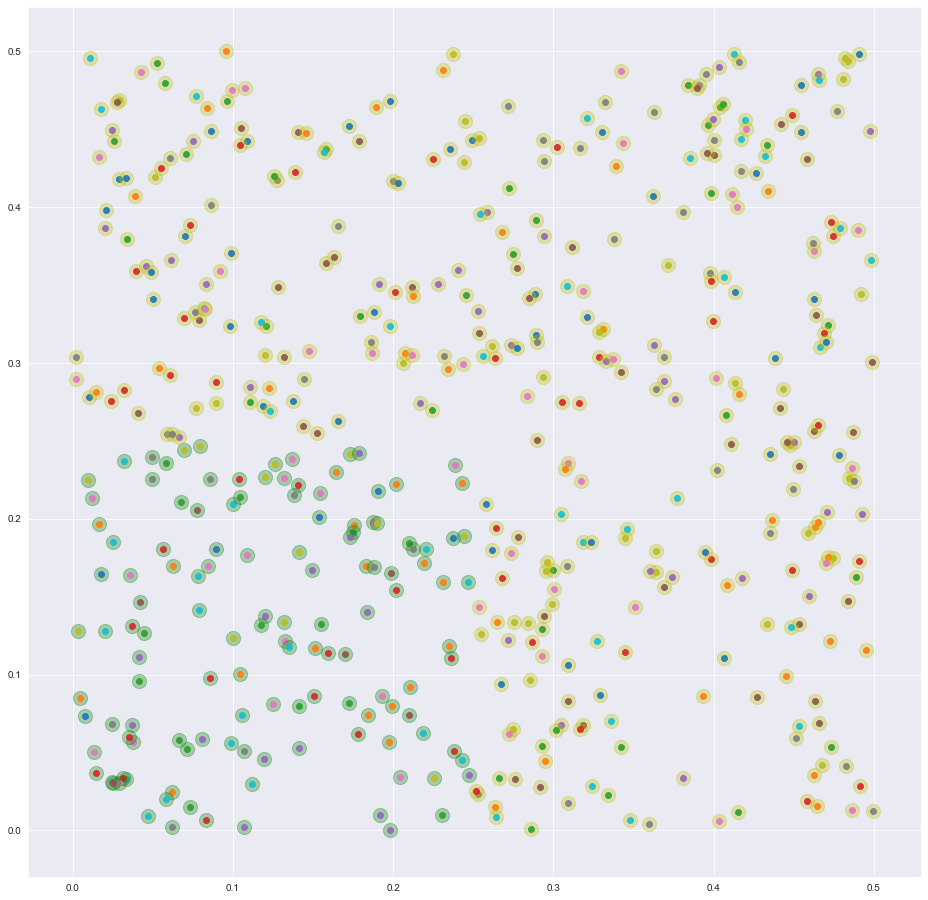

In [35]:
x_test, y_test = [], []
x1_test = abs(np.random.rand(5000))
y1_test = abs(np.random.rand(5000))

# x2_test, y2_test = x1_test, y1_test
x2_test, y2_test = [], []
for i, v in enumerate(x1_test):
    if x1_test[i] <= 0.5 and y1_test[i] <= 0.5 and len(x2_test) < 500:
        x2_test.append(x1_test[i])
        y2_test.append(y1_test[i])
x_test.append(x2_test)
x_test.append(y2_test)
x_test = np.transpose(x_test)

## dont need to shuffle because it is a random set of points

for i in range(len(x_test)):
    x0, y0 = x_test[i]
    if (x0 <= 0.25) and (y0 <= 0.25):
        y_test.append(1)
    else:
        y_test.append(0)
        
# plt.figure(figsize=(16,16))
# plt.scatter(x2_test, y2_test, s=100, alpha=0.5)


plt.figure(figsize=(16,16))
for i,v in enumerate(y_test):
    if y_test[i] == 1:
        plt.scatter(x_test[i][0], x_test[i][1], c='g', s=200, alpha=0.3)
        plt.scatter(x_test[i][0], x_test[i][1], s=35, alpha=0.9)
    else:
        plt.scatter(x_test[i][0], x_test[i][1], c='y', s=200, alpha=0.3)
        plt.scatter(x_test[i][0], x_test[i][1], s=35, alpha=0.9)        

In [36]:
results = model.evaluate(x_test, y_test)
results, model.metrics_names

500/500 [==============================] - 0s 36us/step


([0.17226879954338073, 0.9299999990463257], ['loss', 'acc'])

## b) Generating random data set with variance 0.08
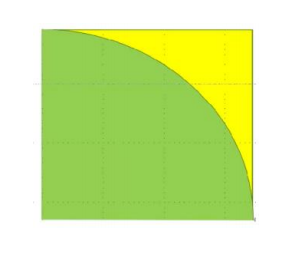

### this is the dataset for the green in 4.b

In [37]:
binary_dataset = []

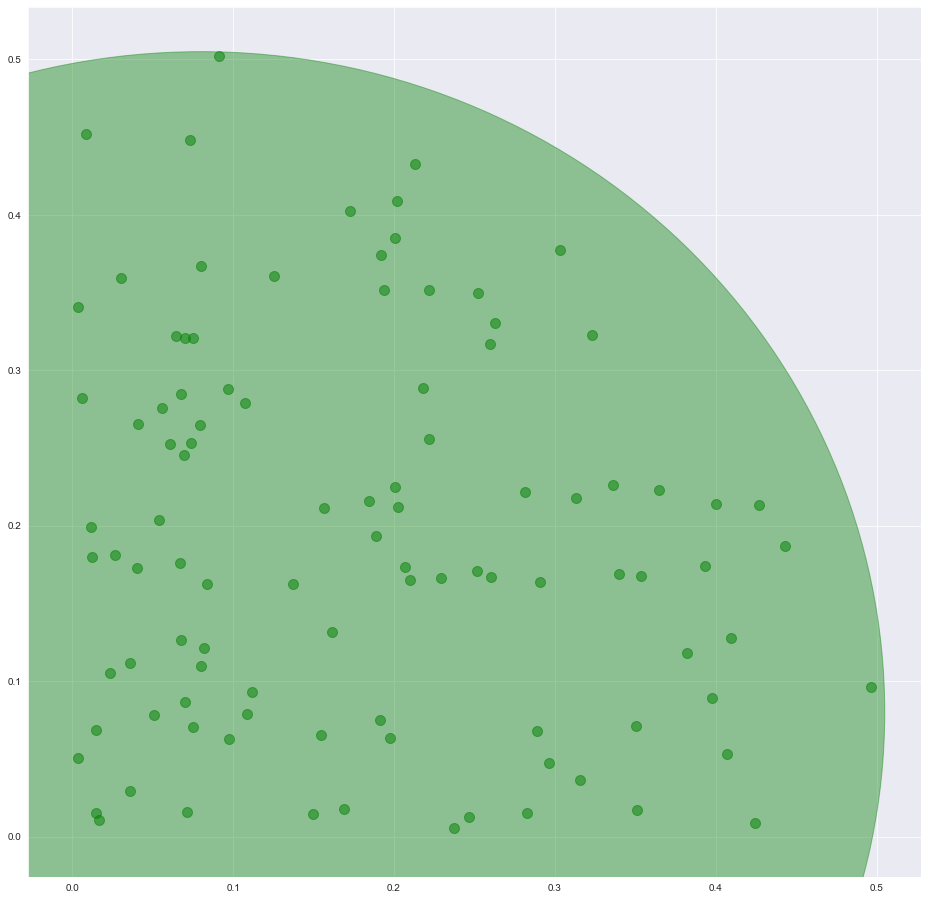

In [38]:
x1 = abs(np.random.normal(0, std, 500))
y1 = abs(np.random.normal(0, std, 500))

radiusSquared = math.pow(0.425, 2)
x2, y2 = [], []
for i, v in enumerate(x1):
    locationRelativeToCircle = math.pow((x1[i] - 0.08), 2) + math.pow((y1[i] - 0.08), 2)
    if (locationRelativeToCircle < radiusSquared) and len(x2) < 100:
        x2.append(x1[i])
        y2.append(y1[i])
binary_dataset.append(x2)
binary_dataset.append(y2)


fig = plt.figure(figsize=(16,16))
fig = plt.gcf()
ax = fig.gca()
circle1 = plt.Circle((0.08, 0.08), 0.425, color='g', alpha=0.4)
ax.add_artist(circle1)
plt.scatter(x2, y2, c='g', s=100, alpha=0.5)

### this is the dataset for the yellow in 4.b

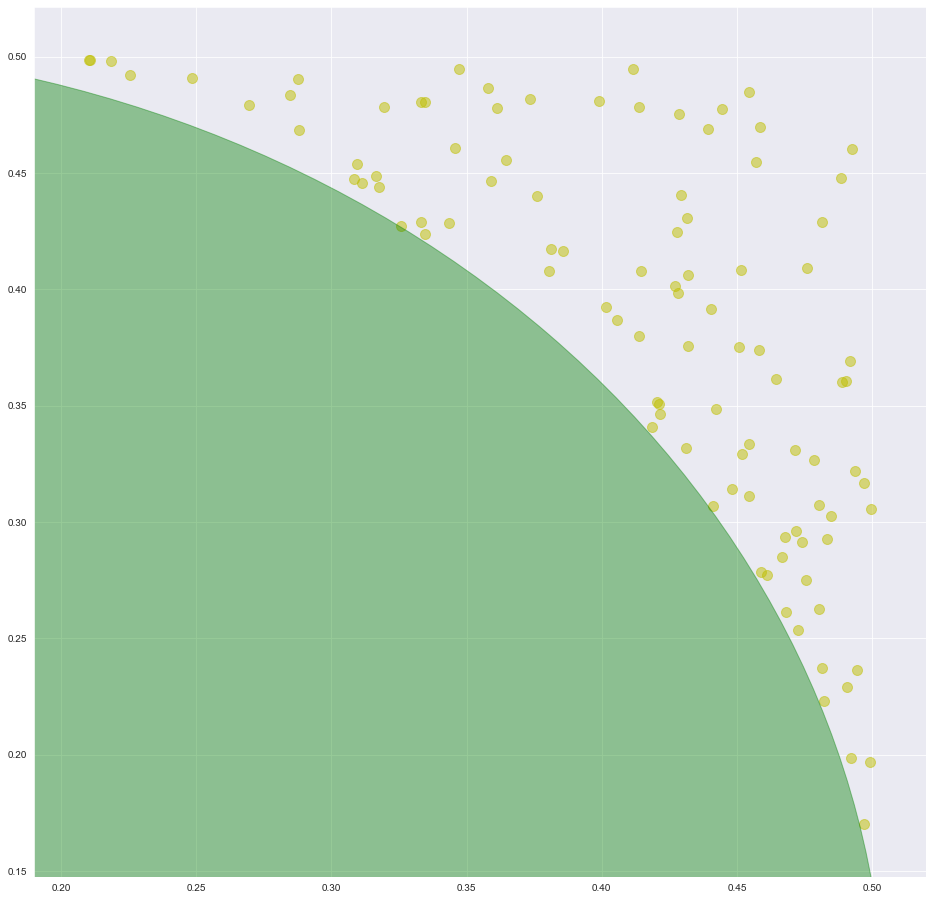

In [39]:
## top right
x1 = abs(np.random.normal(0, std, 15000))
y1 = abs(np.random.normal(0, std, 15000))

radiusSquared = math.pow(0.425, 2)
x2, y2 = [], []
for i, v in enumerate(x1):
    locationRelativeToCircle = math.pow((x1[i] - 0.08), 2) + math.pow((y1[i] - 0.08), 2)
    
    if (locationRelativeToCircle > radiusSquared) \
        and (x1[i] <= 0.5) and (y1[i] <= 0.5) and len(x2) < 100:
        x2.append(x1[i])
        y2.append(y1[i])
binary_dataset[0].extend(x2)
binary_dataset[1].extend(y2)


fig = plt.figure(figsize=(16,16))
fig = plt.gcf()
ax = fig.gca()
circle1 = plt.Circle((0.08, 0.08), 0.425, color='g', alpha=0.4)
ax.add_artist(circle1)
plt.scatter(x2, y2, c='y', s=100, alpha=0.5)

In [40]:
dataset = np.transpose(binary_dataset)

df = pd.DataFrame(dataset)
## shuffle a few times
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
dataset = df.to_numpy()
df

,0,1
0,0.005872,0.282039
1,0.491857,0.369168
2,0.041134,0.265270
3,0.309509,0.453798
4,0.431586,0.430521
...,...,...
195,0.156784,0.211208
196,0.345712,0.460630
197,0.333140,0.428842
198,0.248346,0.490869


## generate and validate labels

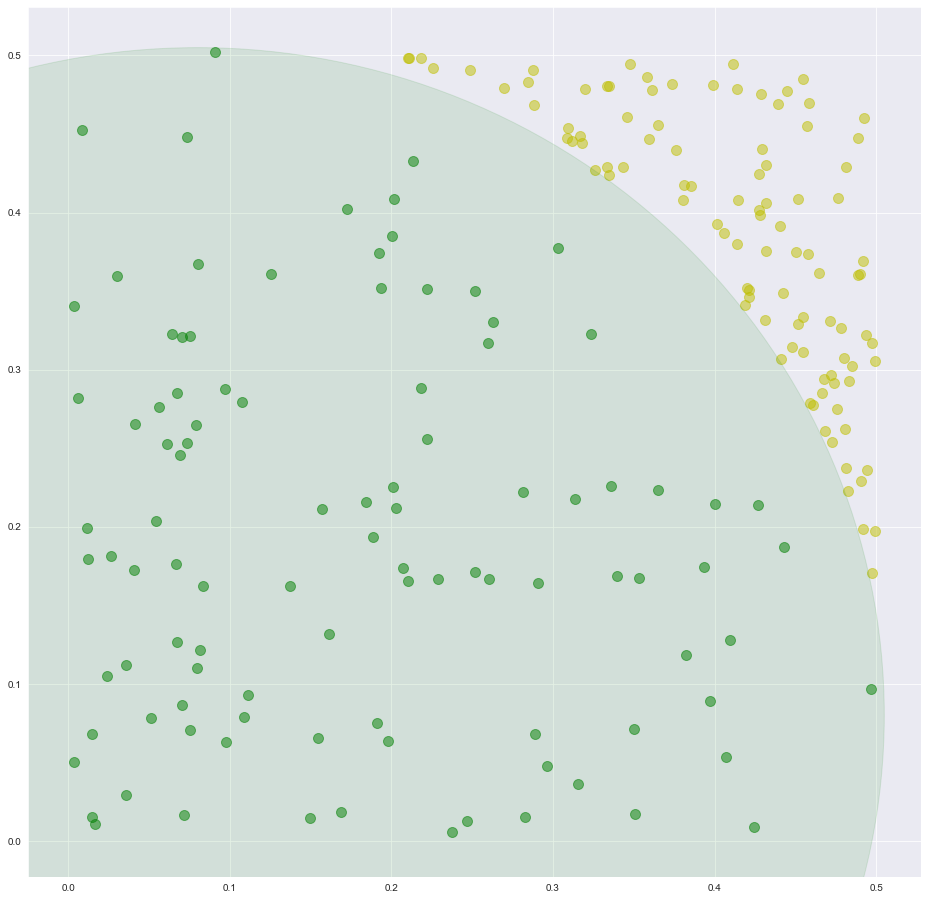

In [41]:
labels = []
ones = []
zeros = []
radiusSquared = math.pow(0.425, 2)

for i in range(len(dataset)):
    x0, y0 = dataset[i]
    locationRelativeToCircle = math.pow((x0 - 0.08), 2) + math.pow((y0 - 0.08), 2)

    if (locationRelativeToCircle > radiusSquared):
        labels.append(1)
        ones.append(i)
    else:
        labels.append(0)
        zeros.append(i)
        
fig = plt.figure(figsize=(16,16))
fig = plt.gcf()
ax = fig.gca()
circle1 = plt.Circle((0.08, 0.08), 0.425, color='g', alpha=0.1)
ax.add_artist(circle1)
for i,v in enumerate(labels):    
    if labels[i] == 1:
        plt.scatter(dataset[i][0], dataset[i][1], c='y', s=100, alpha=0.5)
    else:
        plt.scatter(dataset[i][0], dataset[i][1], c='g', s=100, alpha=0.5)

In [42]:
x_train = dataset[:160]
y_train = labels[:160]

x_val = dataset[-40:]
y_val = labels[-40:]
(x_train.shape, len(y_train)), (x_val.shape, len(y_val))

(((160, 2), 160), ((40, 2), 40))

## For this problem I chose to use:
- 1 hidden layer
- relu as the activation for the input and hidden layers (because binary data: 0 or 1 as ouput) 
- sigmoid for activation in last layer (because sum of outputs does not to equal 1)
- rmsprop (because its good for SGD) 
- binary_crossentropy for loss (because data is binary)

## My model

In [43]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

In [45]:
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(x_val, y_val))

Train on 160 samples, validate on 40 samples
Epoch 1/100
160/160 [==============================] - 0s 3ms/step - loss: 0.6865 - acc: 0.5687 - val_loss: 0.6728 - val_acc: 0.6750
Epoch 2/100
160/160 [==============================] - 0s 225us/step - loss: 0.6803 - acc: 0.5375 - val_loss: 0.6662 - val_acc: 0.7000
Epoch 3/100
160/160 [==============================] - 0s 119us/step - loss: 0.6756 - acc: 0.6063 - val_loss: 0.6582 - val_acc: 0.7000
Epoch 4/100
160/160 [==============================] - 0s 137us/step - loss: 0.6699 - acc: 0.6562 - val_loss: 0.6510 - val_acc: 0.7500
Epoch 5/100
160/160 [==============================] - 0s 187us/step - loss: 0.6643 - acc: 0.6688 - val_loss: 0.6434 - val_acc: 0.7500
Epoch 6/100
160/160 [==============================] - 0s 87us/step - loss: 0.6583 - acc: 0.6500 - val_loss: 0.6370 - val_acc: 0.7500
Epoch 7/100
160/160 [==============================] - 0s 81us/step - loss: 0.6511 - acc: 0.7062 - val_loss: 0.6261 - val_acc: 0.8000
Epoch 8/100
16

160/160 [==============================] - 0s 94us/step - loss: 0.1617 - acc: 0.9750 - val_loss: 0.1499 - val_acc: 0.9750
Epoch 62/100
160/160 [==============================] - 0s 131us/step - loss: 0.1577 - acc: 0.9750 - val_loss: 0.1467 - val_acc: 0.9750
Epoch 63/100
160/160 [==============================] - 0s 125us/step - loss: 0.1546 - acc: 0.9688 - val_loss: 0.1411 - val_acc: 0.9750
Epoch 64/100
160/160 [==============================] - 0s 81us/step - loss: 0.1498 - acc: 0.9750 - val_loss: 0.1363 - val_acc: 0.9750
Epoch 65/100
160/160 [==============================] - 0s 100us/step - loss: 0.1455 - acc: 0.9750 - val_loss: 0.1322 - val_acc: 0.9750
Epoch 66/100
160/160 [==============================] - 0s 131us/step - loss: 0.1416 - acc: 0.9750 - val_loss: 0.1308 - val_acc: 0.9750
Epoch 67/100
160/160 [==============================] - 0s 75us/step - loss: 0.1369 - acc: 0.9688 - val_loss: 0.1303 - val_acc: 0.9750
Epoch 68/100
160/160 [==============================] - 0s 94us/

## Evaluating the model

In [46]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

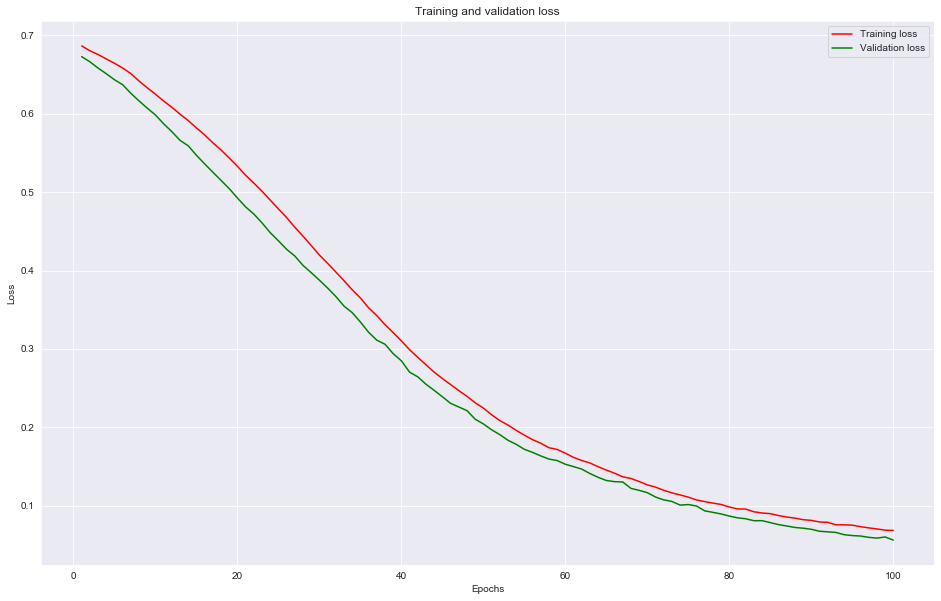

In [47]:
acc = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 10))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

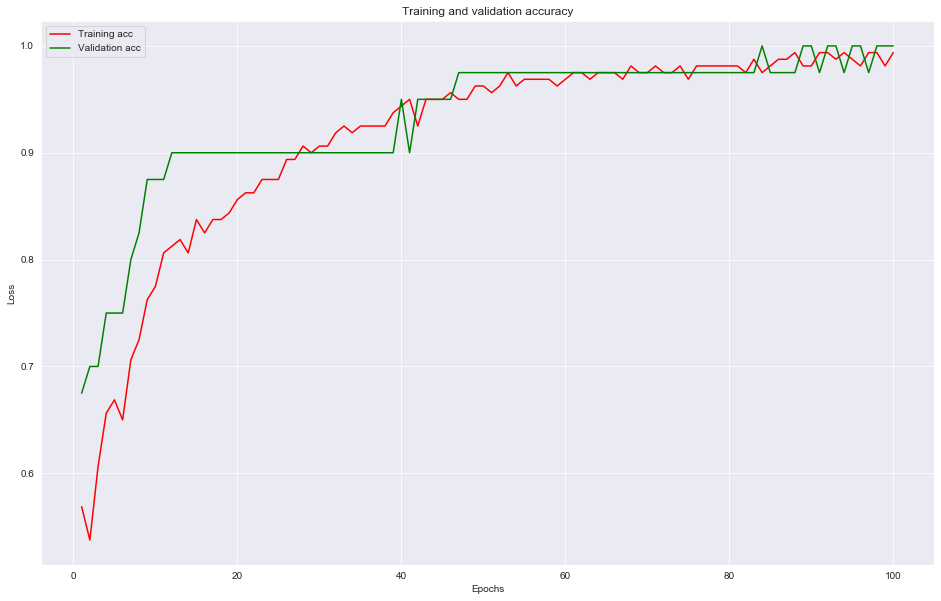

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(16, 10))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing

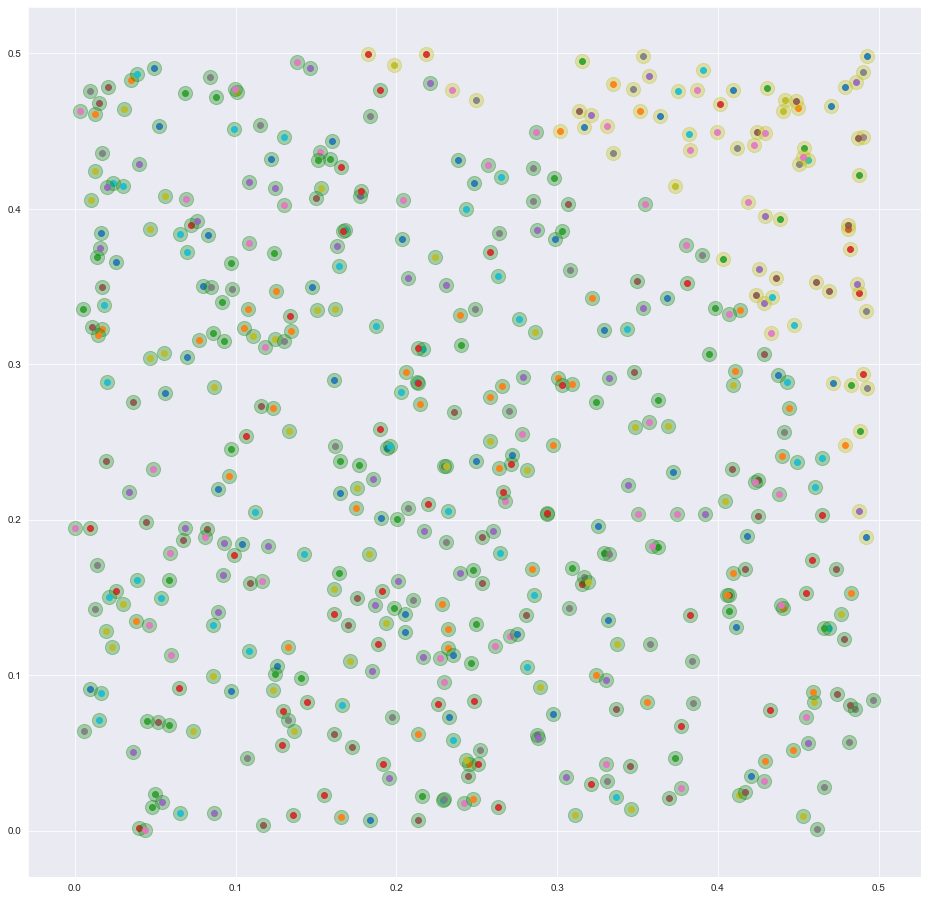

In [49]:
x_test, y_test = [], []
x1_test = abs(np.random.rand(5000))
y1_test = abs(np.random.rand(5000))

x2_test, y2_test = [], []
for i, v in enumerate(x1_test):
    if x1_test[i] <= 0.5 and y1_test[i] <= 0.5 and len(x2_test) < 500:
        x2_test.append(x1_test[i])
        y2_test.append(y1_test[i])
x_test.append(x2_test)
x_test.append(y2_test)
x_test = np.transpose(x_test)

## dont need to shuffle because it is a random set of points

for i in range(len(x_test)):
    x0, y0 = x_test[i]
    locationRelativeToCircle = math.pow((x0 - 0.08), 2) + math.pow((y0 - 0.08), 2)
    if (locationRelativeToCircle > radiusSquared):
        y_test.append(1)
    else:
        y_test.append(0)
        
plt.figure(figsize=(16,16))
for i,v in enumerate(y_test):
    if y_test[i] == 1:
        plt.scatter(x_test[i][0], x_test[i][1], c='y', s=200, alpha=0.3)
        plt.scatter(x_test[i][0], x_test[i][1], s=35, alpha=0.9)
    else:
        plt.scatter(x_test[i][0], x_test[i][1], c='g', s=200, alpha=0.3)
        plt.scatter(x_test[i][0], x_test[i][1], s=35, alpha=0.9) 

In [50]:
results = model.evaluate(x_test, y_test)
results, model.metrics_names

500/500 [==============================] - 0s 21us/step


([0.1945968416929245, 0.9099999995231628], ['loss', 'acc'])

# 😰 😱 🥵 🥶 🤧 🥴